# A Study of Gender and the Industry of Data Science
## Name: Sherlene Chiam | DS102 Course Assignment
<hr>


### Introduction/ Problem Statement
This report aims to find out the trends in the industry of data science and how it differs between binary genders (male and female). In particular, there is a focus on women. These days, I often receive school mailers regarding banks and tech industry events and conferences that are exclusive to women who express an interest in coding. Therefore, I would like to find out more about what women in this Kaggle survey do in their daily lives and how are they utilising their coding skills.

Through this simple analysis, I hope to address these questions:
- What jobs do they have?
- What is their coding learning experience (time spent on coding per day)?
- What tools/programming language do women use more often than men? 

### Datasets Evaluation
The datasets used are obtained from Kaggle: https://www.kaggle.com/kaggle/kaggle-survey-2018/home. 

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

### Data Cleaning and Preparation

In [2]:
# Importing the excel sheets
df = pd.read_csv('multipleChoiceResponses.csv')
df.iloc[:1].transpose()

C:\Users\Sherlene\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0
Time from Start to Finish (seconds),Duration (in seconds)
Q1,What is your gender? - Selected Choice
Q1_OTHER_TEXT,What is your gender? - Prefer to self-describe...
Q2,What is your age (# years)?
Q3,In which country do you currently reside?
Q4,What is the highest level of formal education ...
Q5,Which best describes your undergraduate major?...
Q6,Select the title most similar to your current ...
Q6_OTHER_TEXT,Select the title most similar to your current ...
Q7,In what industry is your current employer/cont...


In [3]:
# Removing survey entries where the gender is indicated as 'Prefer not to say' or 'Prefer to self-describe'  
df['Q1'] = df['Q1'].replace(['What is your gender? - Selected Choice', 'Prefer not to say', 'Prefer to self-describe'], 0)
cond = df['Q1'] != 0
df = df[cond]

# Overview of gender data
df.groupby('Q1').count()

# creating df for each gender
df_female = df.copy()
cond1 = df['Q1'] == 'Female'
df_female = df[cond1]
df_female.head()

df_male = df.copy()
cond2 = df['Q1'] == 'Male'
df_male = df[cond2]
df_male.head()

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,-1,NaN,NaN,Requires too much technical knowledge,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1
5,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1
6,1142,Male,-1,25-29,Colombia,Bachelor’s degree,Physics or astronomy,Data Scientist,-1,Computers/Technology,...,-1,NaN,NaN,NaN,Afraid that others will use my work without gi...,NaN,I had never considered making my work easier f...,NaN,NaN,-1
7,959,Male,-1,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,1,Academics/Education,...,-1,Too expensive,NaN,NaN,NaN,NaN,I had never considered making my work easier f...,NaN,NaN,-1


## 1. Gender and categories of jobs

In [4]:
df_job = df.copy()
grouped_job = df_job.groupby(['Q6', 'Q1']).agg({
    'Q1':['count']
})
grouped_job

Q1
                               count
Q6                      Q1          
Business Analyst        Female   154
                        Male     600
Chief Officer           Female    18
                        Male     331
Consultant              Female   100
                        Male     670
DBA/Database Engineer   Female    21
                        Male     121
Data Analyst            Female   418
                        Male    1476
Data Engineer           Female    95
                        Male     629
Data Journalist         Female     1
                        Male      18
Data Scientist          Female   687
                        Male    3389
Developer Advocate      Female    12
                        Male     102
Manager                 Female    43
                        Male     536
Marketing Analyst       Female    30
                        Male      80
Not employed            Female   181
                        Male     634
Other                   Female   262
                        Male    1035
Principal Investigator  Female    10
                        Male      83
Product/Project Manager Female    55
                        Male     363
Research Assistant      Female   126
                        Male     460
Research Scientist      Female   196
                        Male     974
Salesperson             Female    14
                        Male      86
Software Engineer       Female   359
                        Male    2733
Statistician            Female    58
                        Male     177
Student                 Female  1011
                        Male    4171

#### Separating dataset into male and female

In [5]:
df_job_female = df_female.copy()
df_job_female = df_job_female.dropna(subset=['Q6'])
df_job_female['Q6'].unique()

df_job_female = df_job_female.groupby(['Q6']).agg({
    'Q1':['count']
})

print(df_job_female)

df_job_male = df_male.copy()
df_job_male = df_job_male.dropna(subset=['Q6'])
df_job_male['Q6'].unique()

df_job_male = df_job_male.groupby(['Q6']).agg({
    'Q1':['count']
})

df_job_male

                           Q1
                        count
Q6                           
Business Analyst          154
Chief Officer              18
Consultant                100
DBA/Database Engineer      21
Data Analyst              418
Data Engineer              95
Data Journalist             1
Data Scientist            687
Developer Advocate         12
Manager                    43
Marketing Analyst          30
Not employed              181
Other                     262
Principal Investigator     10
Product/Project Manager    55
Research Assistant        126
Research Scientist        196
Salesperson                14
Software Engineer         359
Statistician               58
Student                  1011


,Q1
,count
Q6,
Business Analyst,600
Chief Officer,331
Consultant,670
DBA/Database Engineer,121
Data Analyst,1476
Data Engineer,629
Data Journalist,18
Data Scientist,3389


### Visualisation

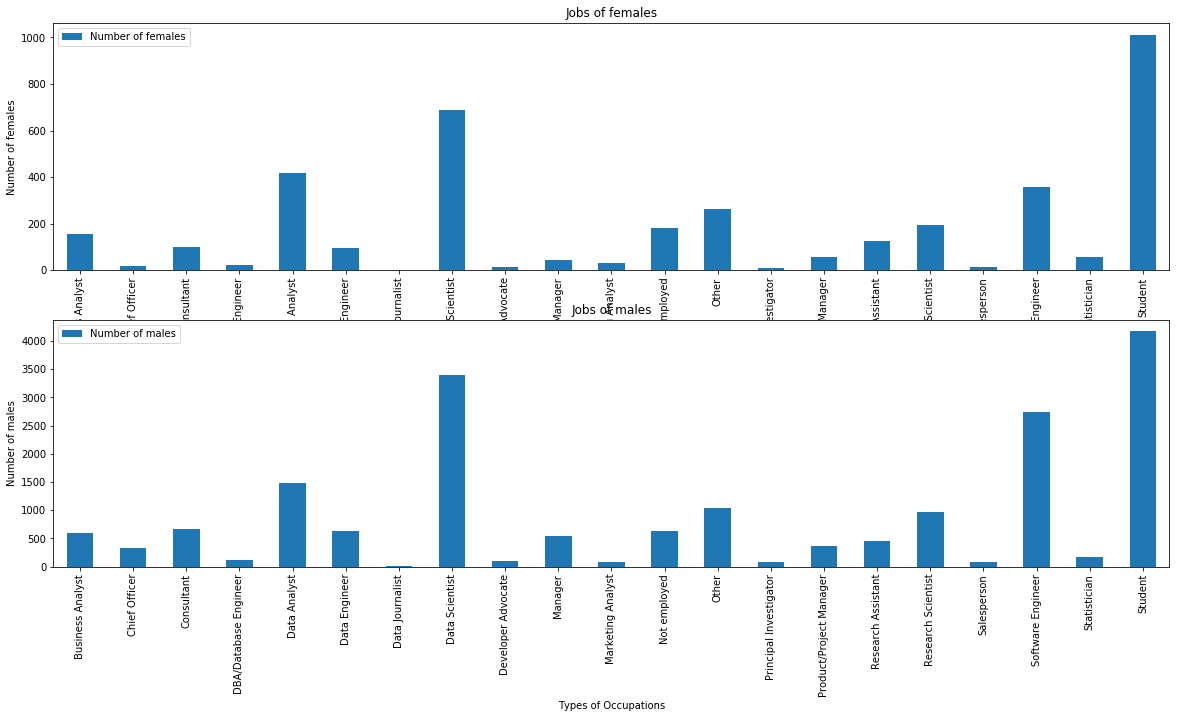

In [6]:
# fig, ax = plt.subplots(figsize=[14,10])
# grouped_job.plot(kind="bar", ax=ax)

fig, ax = plt.subplots(nrows=2, figsize=[20,10])

df_job_female.plot(kind="bar", ax=ax[0])
ax[0].set_title('Jobs of females')
ax[0].set_xlabel('Types of Occupations')
ax[0].set_ylabel('Number of females')
ax[0].legend(['Number of females'])

df_job_male.plot(kind="bar", ax=ax[1])
ax[1].set_title('Jobs of males')
ax[1].set_xlabel('Types of Occupations')
ax[1].set_ylabel('Number of males')
ax[1].legend(['Number of males'])

#### Points noted
- Interestingly, the distribution of jobs accross both females and males are largely similar.
- The top 3 common occupations for
    - Females: student, data scientist, data analyst
    - Males: student, data scientist, data engineer

## 2. Gender and learning experience

In [7]:
# Cleaning data for Q23 by dropping 'na'
df_LE = df.copy()
df_LE = df_LE.dropna(subset=['Q23'])
df_LE['Q23'].unique()

# overview of data
grouped = df_LE.groupby(['Q23', 'Q1']).agg({
    'Q1':['count']
})
grouped

# plot
# fig, ax = plt.subplots()
# grouped.plot(kind='bar',
#              y='Q1',
#              ax=ax)
# plt.show()

Q1
                             count
Q23                   Q1          
0% of my time         Female   106
                      Male     425
1% to 25% of my time  Female   695
                      Male    3426
100% of my time       Female    66
                      Male     406
25% to 49% of my time Female   780
                      Male    4172
50% to 74% of my time Female   877
                      Male    4579
75% to 99% of my time Female   457
                      Male    2275

#### Separating the data into male and female for plotting

In [8]:
# females
df_LE_female = df_female.copy()
df_LE_female = df_LE_female.dropna(subset=['Q23'])
df_LE_female['Q23'].unique()

grouped_female = df_LE_female.groupby(['Q23']).agg({
    'Q1':['count']
})

print(grouped_female)

# males
df_LE_male = df_male.copy()
df_LE_male = df_LE_male.dropna(subset=['Q23'])
df_LE_male['Q23'].unique()

grouped_male = df_LE_male.groupby(['Q23']).agg({
    'Q1':['count']
})
grouped_male

                         Q1
                      count
Q23                        
0% of my time           106
1% to 25% of my time    695
100% of my time          66
25% to 49% of my time   780
50% to 74% of my time   877
75% to 99% of my time   457


,Q1
,count
Q23,
0% of my time,425
1% to 25% of my time,3426
100% of my time,406
25% to 49% of my time,4172
50% to 74% of my time,4579
75% to 99% of my time,2275


#### Converting numbers into percentages
- There is a need to do this because there is significantly more males and females in this Kaggle survey - hence, visualisation solely based on numbers may be misleading.

In [9]:
total_female = grouped_female['Q1'].sum()
total_female = total_female['count']
total_female

percent_grouped_female = grouped_female.copy()
percent_grouped_female['percentage of females'] = (grouped_female['Q1']/total_female)*100
print(percent_grouped_female)

total_male = grouped_male['Q1'].sum()
total_male = total_male['count']
total_male

percent_grouped_male = grouped_male.copy()
percent_grouped_male['percentage of males'] = (grouped_male['Q1']/total_male)*100
percent_grouped_male

                         Q1 percentage of females
                      count                      
Q23                                              
0% of my time           106              3.555854
1% to 25% of my time    695             23.314324
100% of my time          66              2.214022
25% to 49% of my time   780             26.165716
50% to 74% of my time   877             29.419658
75% to 99% of my time   457             15.330426


,Q1,percentage of males
,count,
Q23,,
0% of my time,425,2.780868
1% to 25% of my time,3426,22.417065
100% of my time,406,2.656546
25% to 49% of my time,4172,27.298305
50% to 74% of my time,4579,29.961395
75% to 99% of my time,2275,14.885821


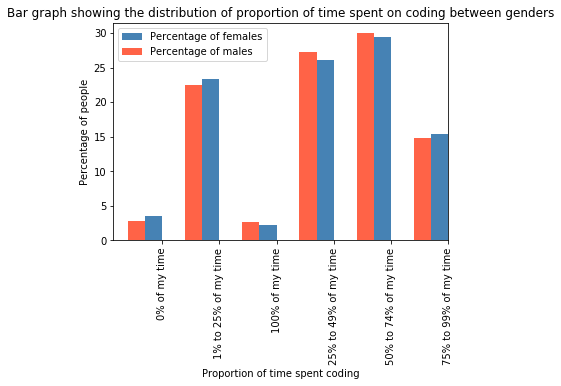

In [10]:
fig, ax = plt.subplots()

#for females
percent_grouped_female.plot(kind='bar', y='percentage of females', ax=ax, color='steelblue', position = 1, width=0.30)

# Plot the values for 'female_percentage' Specify position=2
# and color='tomato'
percent_grouped_male.plot(kind='bar', y='percentage of males', ax=ax, color='tomato', position = 2, width=0.30)

ax.set_title('Bar graph showing the distribution of proportion of time spent on coding between genders')
ax.set_xlabel('Proportion of time spent coding')
ax.set_ylabel('Percentage of people')
ax.legend(['Percentage of females', 'Percentage of males'])

#### Points noted
- Most females and males spent 50 to 74% of their time on coding.
- The slight differences in percentages in each category of proportion are not very significant.

## 3. Gender and coding language
#### Grouping the data

In [11]:
## for females
# Get only qn 16
qn_16 = df_female[["Q16_Part_" + str(x) for x in range(1, 19)]]

# Unpivot the tables
melted = pd.melt(qn_16, var_name="Qn Part", value_name="Language")

# Drop nan
df_lang_f = df_female.copy() 
df_lang_f = melted.dropna().groupby('Language').count()
print(df_lang_f)

## for males
# Get only qn 16
qn_16 = df_male[["Q16_Part_" + str(x) for x in range(1, 19)]]

# Unpivot the tables
melted = pd.melt(qn_16, var_name="Qn Part", value_name="Language")

# Drop nan
df_lang_m = df_male.copy() 
df_lang_m = melted.dropna().groupby('Language').count()
df_lang_m

                       Qn Part
Language                      
Bash                       284
C#/.NET                    191
C/C++                      587
Go                          31
Java                       574
Javascript/Typescript      352
Julia                       14
MATLAB                     519
None                        90
Other                       80
PHP                        142
Python                    2347
R                         1351
Ruby                        40
SAS/STATA                  254
SQL                       1447
Scala                       88
Visual Basic/VBA           187


,Qn Part
Language,
Bash,2372
C#/.NET,1450
C/C++,3728
Go,353
Java,3361
Javascript/Typescript,2835
Julia,207
MATLAB,2088
None,231


#### Converting to percentages

In [12]:
total_lang_f = df_lang_f['Qn Part'].sum()
total_lang_f

percent_df_lang_f = df_lang_f.copy()
percent_df_lang_f['percentage of females'] = (df_lang_f['Qn Part']/total_lang_f)*100
print(percent_df_lang_f)

total_lang_m = df_lang_m['Qn Part'].sum()
total_lang_m

percent_df_lang_m = df_lang_m.copy()
percent_df_lang_m['percentage of males'] = (df_lang_m['Qn Part']/total_lang_m)*100
percent_df_lang_m

                       Qn Part  percentage of females
Language                                             
Bash                       284               3.310795
C#/.NET                    191               2.226626
C/C++                      587               6.843087
Go                          31               0.361390
Java                       574               6.691536
Javascript/Typescript      352               4.103521
Julia                       14               0.163208
MATLAB                     519               6.050361
None                        90               1.049196
Other                       80               0.932618
PHP                        142               1.655398
Python                    2347              27.360690
R                         1351              15.749592
Ruby                        40               0.466309
SAS/STATA                  254               2.961063
SQL                       1447              16.868734
Scala                       

,Qn Part,percentage of males
Language,,
Bash,2372,5.143886
C#/.NET,1450,3.144450
C/C++,3728,8.084488
Go,353,0.765511
Java,3361,7.288617
Javascript/Typescript,2835,6.147941
Julia,207,0.448897
MATLAB,2088,4.528007
None,231,0.500943


### Visualisation

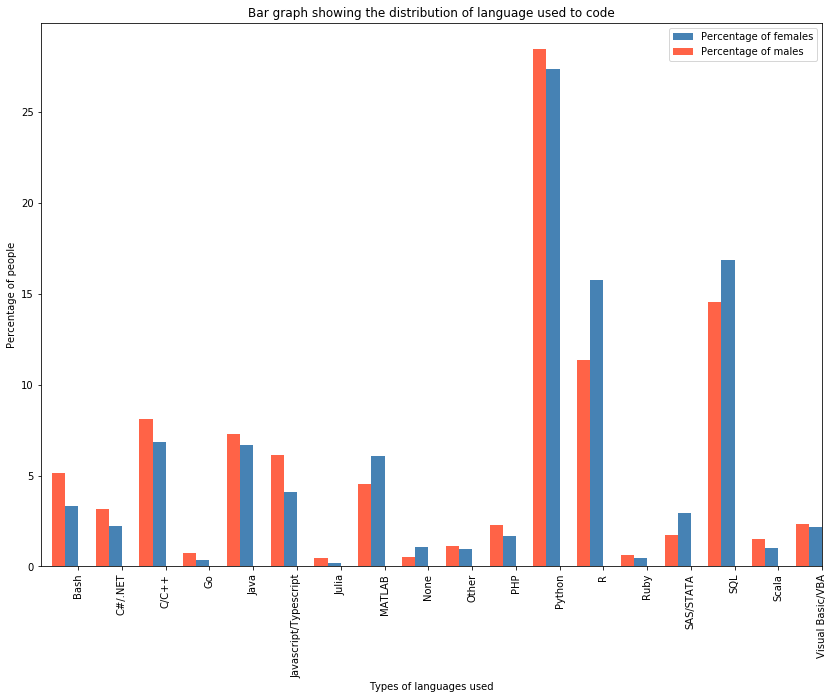

In [14]:
fig, ax = plt.subplots(figsize=[14,10])

#for females
percent_df_lang_f.plot(kind='bar', y='percentage of females', ax=ax, color='steelblue', position = 1, width=0.30)

# Plot the values for 'female_percentage' Specify position=2
# and color='tomato'
percent_df_lang_m.plot(kind='bar', y='percentage of males', ax=ax, color='tomato', position = 2, width=0.30)

ax.set_title('Bar graph showing the distribution of language used to code')
ax.set_xlabel('Types of languages used')
ax.set_ylabel('Percentage of people')
ax.legend(['Percentage of females', 'Percentage of males'])

#### Points noted
Distributions seem largely similar except for
- Significantly more females use R and SQL, followed by MATLAB than males.
- Significantly more males use Javascript/Typescript and Bash than females.

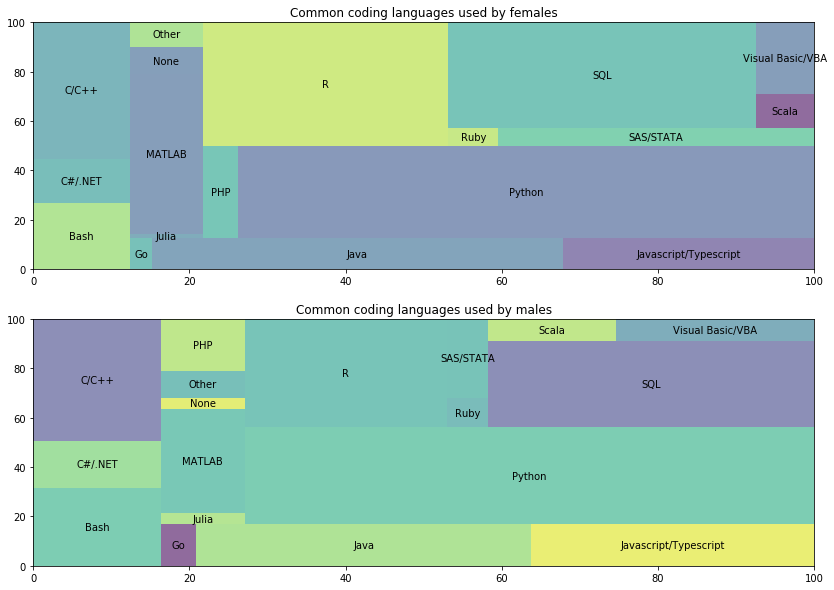

In [15]:
# Squarified Treemap Layout
# Implements algorithm from Bruls, Huizing, van Wijk, "Squarified Treemaps"
#   (but not using their pseudocode)

def normalize_sizes(sizes, dx, dy):
    total_size = sum(sizes)
    total_area = dx * dy
    sizes = map(float, sizes)
    sizes = map(lambda size: size * total_area / total_size, sizes)
    return list(sizes)

def pad_rectangle(rect):
    if rect['dx'] > 2:
        rect['x'] += 1
        rect['dx'] -= 2
    if rect['dy'] > 2:
        rect['y'] += 1
        rect['dy'] -= 2

def layoutrow(sizes, x, y, dx, dy):
    # generate rects for each size in sizes
    # dx >= dy
    # they will fill up height dy, and width will be determined by their area
    # sizes should be pre-normalized wrt dx * dy (i.e., they should be same units)
    covered_area = sum(sizes)
    width = covered_area / dy
    rects = []
    for size in sizes:
        rects.append({'x': x, 'y': y, 'dx': width, 'dy': size / width})
        y += size / width
    return rects

def layoutcol(sizes, x, y, dx, dy):
    # generate rects for each size in sizes
    # dx < dy
    # they will fill up width dx, and height will be determined by their area
    # sizes should be pre-normalized wrt dx * dy (i.e., they should be same units)
    covered_area = sum(sizes)
    height = covered_area / dx
    rects = []
    for size in sizes:
        rects.append({'x': x, 'y': y, 'dx': size / height, 'dy': height})
        x += size / height
    return rects

def layout(sizes, x, y, dx, dy):
    return layoutrow(sizes, x, y, dx, dy) if dx >= dy else layoutcol(sizes, x, y, dx, dy)

def leftoverrow(sizes, x, y, dx, dy):
    # compute remaining area when dx >= dy
    covered_area = sum(sizes)
    width = covered_area / dy
    leftover_x = x + width
    leftover_y = y
    leftover_dx = dx - width
    leftover_dy = dy
    return (leftover_x, leftover_y, leftover_dx, leftover_dy)

def leftovercol(sizes, x, y, dx, dy):
    # compute remaining area when dx >= dy
    covered_area = sum(sizes)
    height = covered_area / dx
    leftover_x = x
    leftover_y = y + height
    leftover_dx = dx
    leftover_dy = dy - height
    return (leftover_x, leftover_y, leftover_dx, leftover_dy)

def leftover(sizes, x, y, dx, dy):
    return leftoverrow(sizes, x, y, dx, dy) if dx >= dy else leftovercol(sizes, x, y, dx, dy)

def worst_ratio(sizes, x, y, dx, dy):
    return max([max(rect['dx'] / rect['dy'], rect['dy'] / rect['dx']) for rect in layout(sizes, x, y, dx, dy)])

def squarify(sizes, x, y, dx, dy):
    # sizes should be pre-normalized wrt dx * dy (i.e., they should be same units)
    # or dx * dy == sum(sizes)
    # sizes should be sorted biggest to smallest
    sizes = list(map(float, sizes))
    
    if len(sizes) == 0:
        return []
    
    if len(sizes) == 1:
        return layout(sizes, x, y, dx, dy)
    
    # figure out where 'split' should be
    i = 1
    while i < len(sizes) and worst_ratio(sizes[:i], x, y, dx, dy) >= worst_ratio(sizes[:(i+1)], x, y, dx, dy):
        i += 1
    current = sizes[:i]
    remaining = sizes[i:]
    
    (leftover_x, leftover_y, leftover_dx, leftover_dy) = leftover(current, x, y, dx, dy)
    return layout(current, x, y, dx, dy) + \
            squarify(remaining, leftover_x, leftover_y, leftover_dx, leftover_dy)

def padded_squarify(sizes, x, y, dx, dy):
    rects = squarify(sizes, x, y, dx, dy)
    for rect in rects:
        pad_rectangle(rect)
    return rects

def plot(sizes, norm_x=100, norm_y=100,
         color=None, label=None, value=None,
         ax=None, **kwargs):

    """
    Plotting with Matplotlib.

    Parameters
    ----------
    sizes: input for squarify
    norm_x, norm_y: x and y values for normalization
    color: color string or list-like (see Matplotlib documentation for details)
    label: list-like used as label text
    value: list-like used as value text (in most cases identical with sizes argument)
    ax: Matplotlib Axes instance
    kwargs: dict, keyword arguments passed to matplotlib.Axes.bar

    Returns
    -------
    axes: Matplotlib Axes
    """
    
    import matplotlib.pyplot as plt

    if ax is None:
        ax = plt.gca()

    if color is None:
        import matplotlib.cm
        import random
        cmap = matplotlib.cm.get_cmap()
        color = [cmap(random.random()) for i in range(len(sizes))]

    normed = normalize_sizes(sizes, norm_x, norm_y)
    rects = squarify(normed, 0, 0, norm_x, norm_y)
    
    x = [rect['x'] for rect in rects]
    y = [rect['y'] for rect in rects]
    dx = [rect['dx'] for rect in rects]
    dy = [rect['dy'] for rect in rects]

    ax.bar(x, dy, width=dx, bottom=y, color=color,
       label=label, align='edge', **kwargs)

    if not value is None:
        va = 'center' if label is None else 'top'
            
        for v, r in zip(value, rects):
            x, y, dx, dy = r['x'], r['y'], r['dx'], r['dy']
            ax.text(x + dx / 2, y + dy / 2, v, va=va, ha='center')

    if not label is None:
        va = 'center' if value is None else 'bottom'
        for l, r in zip(label, rects):
            x, y, dx, dy = r['x'], r['y'], r['dx'], r['dy']
            ax.text(x + dx / 2, y + dy / 2, l, va=va, ha='center')

    ax.set_xlim(0, norm_x)
    ax.set_ylim(0, norm_y)
    return ax 

fig, ax = plt.subplots(nrows=2, figsize=[14,10])

plot(sizes=df_lang_f['Qn Part'], label=df_lang_f.index, alpha=.6, ax=ax[0])
ax[0].set_title('Common coding languages used by females')

plot(sizes=df_lang_m['Qn Part'], label=df_lang_m.index, alpha=.6, ax=ax[1])
ax[1].set_title('Common coding languages used by males')
plt.show()

#### Points noted
- In contrast, there does not seem to be much difference in the usage of Python between genders.
- What is more evident at first glance from these treemaps are
    - More males use Java and C/C++ than females.
    - More females use R than males.

### Discussion/Conclusion

My main analysis is to observe whether there are significant differences in terms of coding languages, jobs performed and time spent on coding accross the binary genders. In these categories, it seems like the distributions of coding languages and time spend on coding are largely similar for both females and males. This might be due to the nature of the work itself, that some coding languages are naturally more commonly used given the job scopes of the people, eg. many of the surveyees are data scientists, who are more likely to use R, Python and SQL as their common coding languages (according to https://bigdata-madesimple.com/how-i-chose-the-right-programming-language-for-data-science/).

Perhaps in the future, a possible analysis to be done is to see whether the jobs and the coding languages used to predict the percentage of time spent on coding, to see if there is some correlation between the 3 factors. Also, it might be more useful to focus on the slight deviations between the two genders for future analysis, eg. there are significantly more male software engineers than their female counterparts. 

Lastly, for my own personal use, I think it might be useful to pick up R as the next language for data visualisation.